Link to Data Source : https://www.kaggle.com/datasets/adithyabshetty100/student-performance

Giới thiệu khái quát datasets

Câu 1: Viết chương trình cài đặt phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy của một thông số thống kê của một biến (đặc trưng) nào đó của dataset với:
------
• Biến (đặc trưng): do SV chọn từ dataset.\
• Thông số thống kê: giá trị trung bình (GTTB).\
• Viết hàm có:\
    • Input parameters: n (sample size), M (number of bootstrap samplings), x (confidence interval in %).\
    • Return values: phân bố lấy mẫu (bằng histogram) và dải tin cậy của GTTB của đặc trưng đã chọn.

In [2]:
#Các thư viện cần thiết
import pandas as pd

#Các thư viện dùng để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Đọc file dataset .csv vào data frame
df = pd.read_csv('../bootstrap-sampling-method/StudentsPerformance.csv')

#Xóa tất cả các hàng chứa giá trị rỗng
df = df.dropna()

#Kích thước của data frame
df.shape

(1000, 8)

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

=> Các giá trị rỗng đã được loại bỏ khỏi Dataset

Hàm sử dụng phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy:
-----------------------------------------------------------------
Đầu vào: N, M, x.\
Trong đó: \
    + N: số quan sát có trong 1 mẫu (kích thước của 1 mẫu).\
    + M: số lượng mẫu Bootstap.\
    + x: khoảng tin cậy (%).

Thêm markdown giải thích ý tưởng

In [5]:
#Hàm phân bố lấy mẫu sử dụng phương pháp Bootstrap
def bootstrapping(N, M, x):
    #Khởi tạo các biến
    upper_bound = 0
    lower_bound = 0
    mean_bootstrap = []

    for _ in range(M):
        #Tạo mẫu với kích thước là N, các giá trị có thể lặp
        new_df = df_math_score.sample(n= N, replace=True)

        #Lưu giá trị Mean tìm được của mẫu đó
        mean_bootstrap.append(float(new_df.mean(axis=0)))

    #Tạo từ điển với thuộc tính: Mean Bootstrap (Math Score)
    dict = {'Mean Bootstrap (Math Score)': mean_bootstrap}
    mean_bootstrap = pd.DataFrame(dict)

    #Sắp xếp lại các giá trị theo thuộc tính 'Mean Bootstrap (Math Score)' trong mean_bootstrap theo thứ tự tăng dần
    sorted_df = mean_bootstrap.sort_values(by='Mean Bootstrap (Math Score)', ascending=True)
    
    lower_bound = sorted_df.iloc[round(M*x)] #Tính vị trí giới hạn dưới
    upper_bound = sorted_df.iloc[round(M*(1-x))] #Tính vị trí giới hạn trên
    mean_line = sorted_df.mean() #Tính vị trí của mean

    return mean_bootstrap, lower_bound, upper_bound, mean_line


Cơ sở để tính dải tin cậy:
-------
Cú pháp hàm SMALL trong file excel Bootstrap_method:\
SMALL(array, k)\
\
        * Trong đó:\
            -array: Là phạm vi vùng dữ liệu dạng số chứa giá trị bạn cần xác định giá trị nhỏ thứ k.\
            -k: Là thứ hạng của giá trị (tính từ giá trị nhỏ nhất) trong vùng dữ liệu cần trả về.\
\
ÁP DỤNG:
* Sử dụng hàm iloc trong dataframe để tìm giá trị của vị trí có trong tập data frame
* array sẽ là tập sorted_df. 
* Đối với cách tìm vị trí giới hạn dưới: 
    - k = M * x.
* Đối với cách tìm vị trí giới hạn trên: 
    - k = M * (1 - x).

Xuất đồ thị Histogram - phân bố lấy mẫu với dải tin cậy của GTTB của đặc trưng
------------------------------------------------------------

Giới hạn dưới: 64.75
Giới hạn trên: 67.46
Mean: 66.1


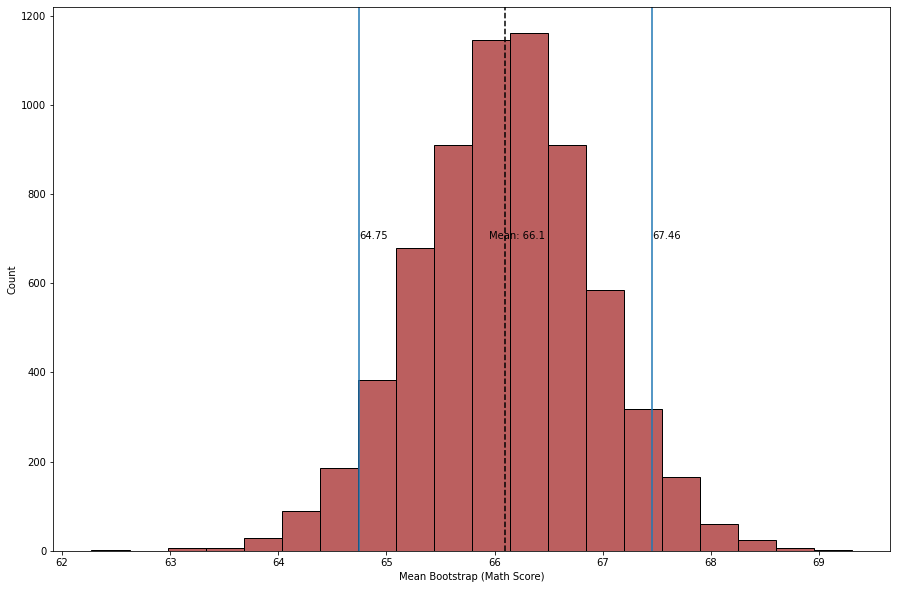

In [25]:
#Lấy tất cả record có trong dataset (gồm 1000 records) với đặc trưng (biến) là 'math score'
df_math_score = df['math score']

#Gọi hàm bootstrapping
mean_bootstrap, lower_bound, upper_bound, mean_line = bootstrapping(333,6666,0.05) # tương úng với n, M, x%

#Histogram
plt.figure(figsize=(15,10))
sns.histplot(mean_bootstrap['Mean Bootstrap (Math Score)'] ,color = 'brown', bins=20)

#Khoảng tin cậy
lower_bound = float("{:.2f}".format(float(lower_bound)))
upper_bound = float( "{:.2f}".format(float(upper_bound)))
mean_line = float( "{:.2f}".format(float(mean_line)))

#In ra các giá trị
print('Giới hạn dưới: ' + str(lower_bound))
print('Giới hạn trên: '  + str(upper_bound))
print('Mean: '  + str(mean_line))

#Vẽ các biên
plt.axvline(lower_bound, 0,20)
plt.axvline(upper_bound, 0,20)
plt.axvline(mean_line, 0,20, color = 'k', linestyle = '--')

plt.text(lower_bound, 700, str(lower_bound), fontsize=10)
plt.text(upper_bound, 700, str(upper_bound), fontsize=10)
plt.text(mean_line-0.15, 700, "Mean: " + str(mean_line), fontsize=10)
plt.show()

Câu 2:
Dựa trên cùng dataset với Câu 1, viết chương trình xuất ra và thuyết trình các thống kê mô 
tả quan trọng của các biến, các mối quan hệ giữa các biến, quy luật tiềm ẩn của dataset có 
thể quan sát nhờ các công cụ trực quan hoá dữ liệu (ví dụ: scatter plot, heat/cluster map, 
linear model plot,…).
--------

Các đặc trưng của datasets:

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Giới thiệu giá trị của một vài các đặc trưng trong datasets:

In [8]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

So sánh các điểm số với các đặc trưng còn lại
---------------------

In [18]:
#Thêm 1 đặc trưng về tổng điểm của 3 môn
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


So sánh điểm số của môn Toán, Đọc, Viết với đặc trưng Gender (giới tính):

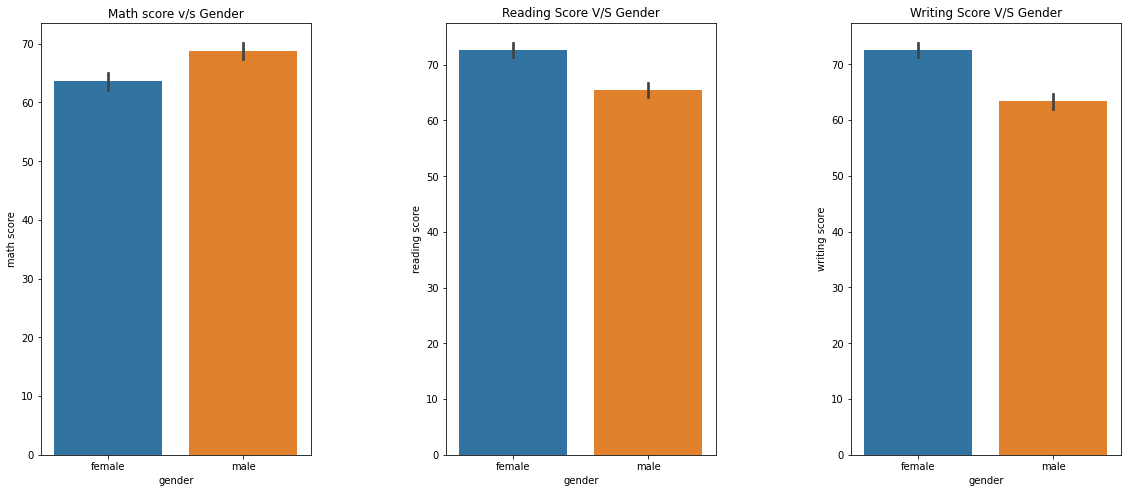

In [12]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1,bottom=0,right=1,left=0,hspace=0.25,wspace=0.5)

plt.subplot(131)
plt.title("Math score v/s Gender")
sns.barplot(x="gender",y='math score',data=df)

plt.subplot(132)
plt.title("Reading Score V/S Gender")
sns.barplot(x='gender',y='reading score',data=df)

plt.subplot(133)
plt.title("Writing Score V/S Gender")
sns.barplot(x='gender',y='writing score',data=df)

plt.show()

* Nhận xét:
    - Các học sinh nam có điểm số tốt hơn các học sinh nữ ở môn Toán.
    - Các học sinh nữ có diểm số tốt hơn các học sinh nam ở cả 2 môn Đọc, Viết.\
    => Nhìn tổng thể thì các học sinh nữ làm bài thi tốt hơn, khi ở có điểm số tốt hơn ở 2 môn.

So sánh điểm số với đặc trưng với Ethnicity (Dân tộc / Nhóm):

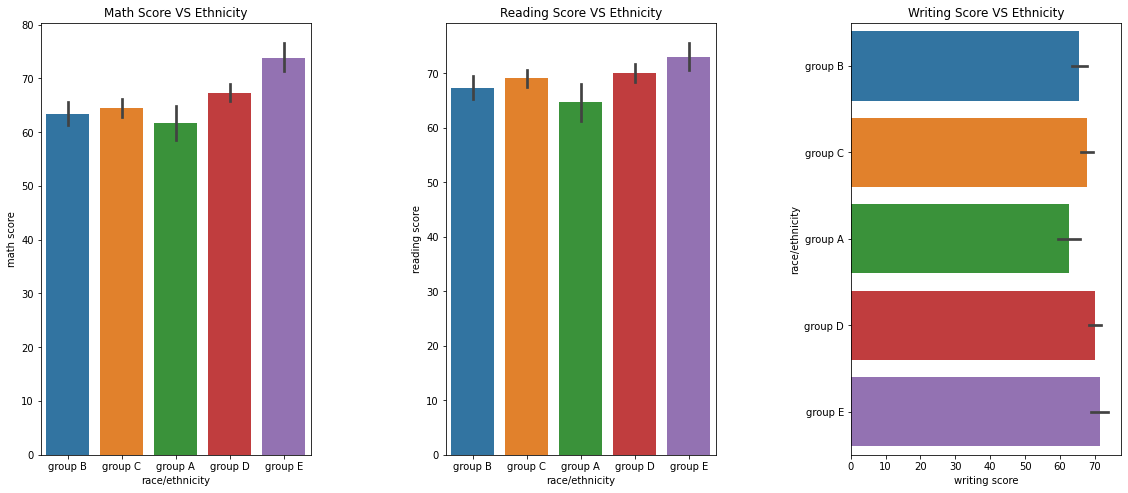

In [16]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1,bottom=0,right=1,left=0,hspace=0.25,wspace=0.5)

plt.subplot(131)
plt.title("Math Score VS Ethnicity")
sns.barplot(x='race/ethnicity',y='math score',data=df)

plt.subplot(132)
plt.title("Reading Score VS Ethnicity")
sns.barplot(x='race/ethnicity',y='reading score',data=df)

plt.subplot(133)
plt.title("Writing Score VS Ethnicity")
sns.barplot(y='race/ethnicity',x='writing score',data=df)


plt.show()

* Nhận xét:
    - Học sinh ở group E có điểm số cả 3 môn tốt nhất.
    - Học sinh ở group A có điểm số cả 3 môn tệ nhất.
    - Điểm số của các học sinh được cải thiện từ group A -> B -> C -> D -> E.

*SCATTER PLOT
-----

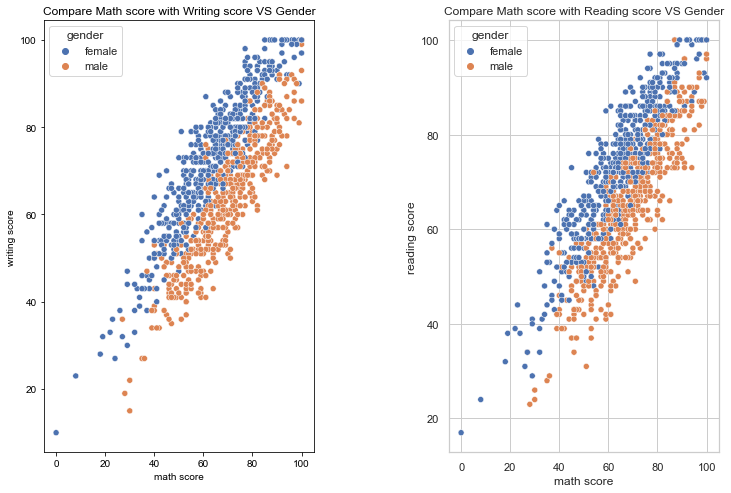

In [8]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1,bottom=0,right=1,left=0,hspace=0.25,wspace=0.5)
plt.subplot(131)
plt.title("Compare Math score with Writing score VS Gender")
sns.set(style='whitegrid')
sns.scatterplot(x="math score", y="writing score", hue="gender", data=df)
plt.subplot(132)
plt.title("Compare Math score with Reading score VS Gender")
sns.set(style='whitegrid')
sns.scatterplot(x="math score", y="reading score", hue="gender", data=df)
plt.show()

Dựa vào 2 hình thống kê theo Scatter Plot trên, em có kết luận:
- Những học sinh nam có giá trị Math Score cao hơn học sinh nữ\
=> Các bạn học sinh nam có tư duy Logic tốt hơn các bạn nữ
- Những học sinh nữ có giá trị Reading Score và Writing Score cao hơn học sinh nam\
=> Các bạn học sinh nữ có kỹ năng đọc hiểu tốt hơn các bạn nam

*BAR PLOT
----


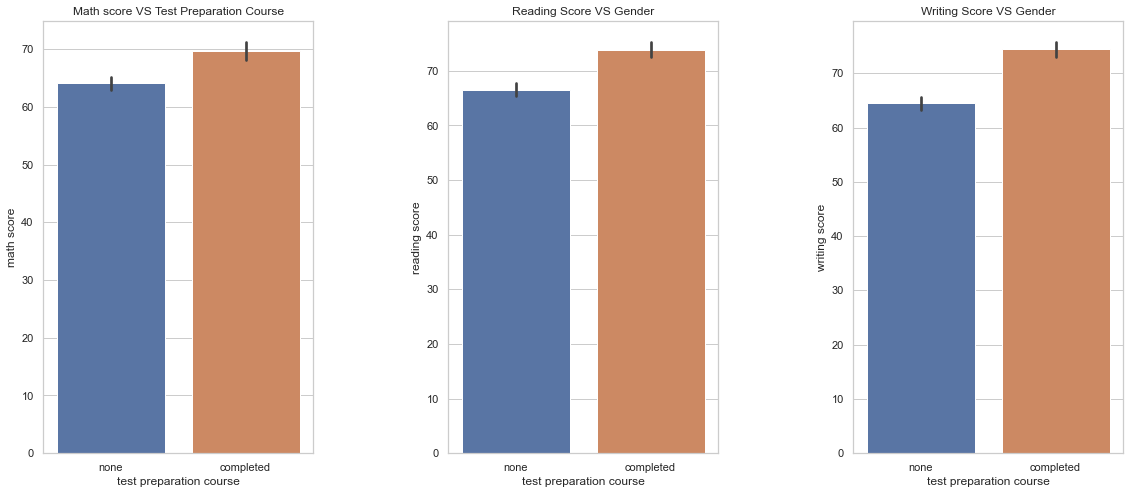

In [58]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1,bottom=0,right=1,left=0,hspace=0.25,wspace=0.5)
plt.subplot(131)
plt.title("Math score VS Test Preparation Course")
sns.barplot(x="test preparation course",y='math score',data=df)
plt.subplot(132)
plt.title("Reading Score VS Gender")
sns.barplot(x='test preparation course',y='reading score',data=df)
plt.subplot(133)
plt.title("Writing Score VS Gender")
sns.barplot(x='test preparation course',y='writing score',data=df)
plt.show()

Dựa vào ba thống kê theo dạng cột trên, em có kết luận:
- Những học sinh đã tham gia khóa học luyện thi đều có điểm số của 3 môn tốt hơn so với những học sinh không tham gia

Tính tổng số điểm của 3 môn của từng record

In [9]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


Thống kê tổng điểm số của 3 môn theo trình độ học vấn của cha mẹ

In [17]:
sns.barplot(x=df['total score'], y=df['parental level of education'])

KeyError: 'total score'

Dựa vào thống kê trên, ta thấy:\
    - Với trình độ học vấn của cha mẹ là: master's degree thì cho ra tổng điểm làm 3 môn là cao nhất\
    - Với trình độ học vấn của cha mẹ là: high school thì cho ra tổng điểm làm 3 môn là thấp nhất\
=> Cha mẹ giáo dục càng nhiều thì trẻ em càng có trình độ học vấn cao.

*HEATMAP PLOT
---------------

corr () được sử dụng để tìm mối tương quan theo từng cặp của tất cả các cột trong khung dữ liệu.\
Mọi giá trị na sẽ tự động bị loại trừ. Đối với bất kỳ cột kiểu dữ liệu không phải số nào trong khung dữ liệu, nó sẽ bị bỏ qua

In [19]:
df_corr = df.corr()
df_corr

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


In [12]:
df_corr['total score'].sort_values(ascending=False)

total score      1.000000
reading score    0.970331
writing score    0.965667
math score       0.918746
Name: total score, dtype: float64

<AxesSubplot:>

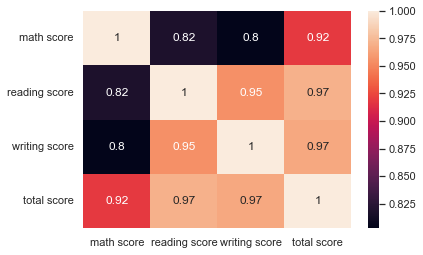

In [13]:
sns.heatmap(data = df_corr, annot = True)

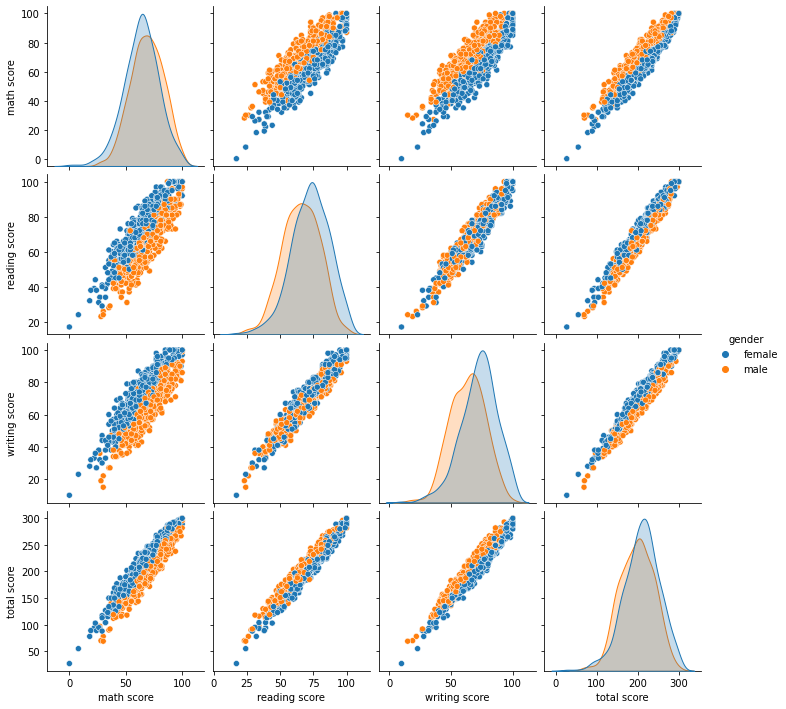

In [21]:
sns.pairplot(df, hue='gender')